In [ ]:
# pip install langgraph langsmith
# pip install langchain langchain_groq langchain_community

In [ ]:
groq_api_key='gsk.......PTO'
langsmith='lsv......26d'

In [2]:
from langchain_groq import ChatGroq

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
llm= ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

In [4]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001876BF15C70>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001874FC51DC0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [6]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    
graph_builder= StateGraph(State)

In [7]:
graph_builder

In [8]:
def chatbot(state: State):
    return {"messages": llm.invoke(state["messages"])}

In [9]:
graph_builder.add_node("chatbot", chatbot)

In [10]:
graph_builder

In [11]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [12]:
graph=graph_builder.compile()

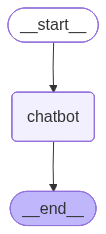

In [13]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [14]:
while True:
    user_input=input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    for event in graph.stream({'messages':("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.001177511, 'queue_time': 0.322808848, 'total_time': 0.032086602}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--00ad0e24-c38c-4d8d-abf6-0ebba6290cd9-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28})}])
content='Hello! 👋 \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.001177511, 'queue_time': 0.322808848, 'total_time': 0.032086602}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--00ad0e24-c3